In [1]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
import healpy as hp
%matplotlib inline
import glob

In [2]:
dbfiles = glob.glob('*10yrs.db')
dbfiles.sort()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="i" for columns ['filter', 'seeingFwhmEff', 'fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 454452 visits
Running:  ['baseline_nexp2_v1_7_1_NgalScale_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


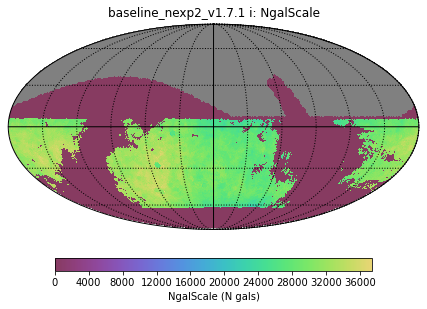

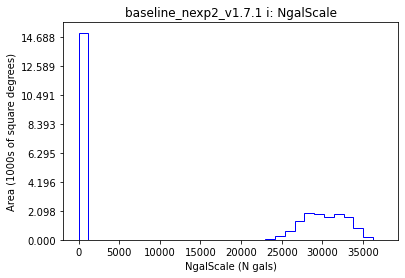

In [3]:
nside=128
sql = 'filter="i"'
# what is this zlim thingy?
#metric = SNNSNMetric( verbose=False, zlim_coeff=0.98)
metric1 = metrics.NgalScaleMetric()
#metric2 = SNNSNMetric( dust=True, verbose=False, metricName='SN_dust')

result_list = []
for filename in [dbfiles[0]]:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
    resultsDb = db.ResultsDb(outDir=runname)
    summaryStats = [metrics.SumMetric()]

    bundleList.append(metricBundles.MetricBundle(metric1, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    outDir = runname
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    #print(runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues)
    #result_list.append((runname, bundleD

In [4]:
print('Total number of weak lensing galaxies (millions):', bundleList[0].summaryValues['Sum']/1e6)

Total number of weak lensing galaxies (millions): 1779.8314171925056


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fiveSigmaDepth', 'filter', 'fieldRA', 'fieldDec'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_NlcPoints_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:106: UserWarning: Optimal bin calculation tried to make 6132 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


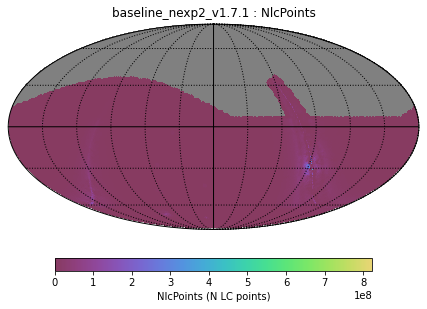

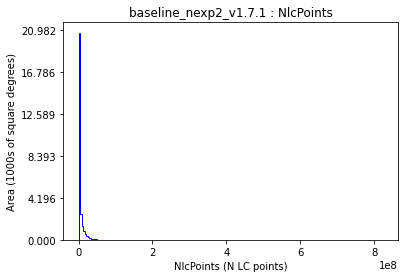

In [5]:
nside=128
sql = ''
# what is this zlim thingy?
#metric = SNNSNMetric( verbose=False, zlim_coeff=0.98)
metric1 = metrics.NlcPointsMetric(nside=nside)
#metric2 = SNNSNMetric( dust=True, verbose=False, metricName='SN_dust')

result_list = []
for filename in [dbfiles[0]]:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
    resultsDb = db.ResultsDb(outDir=runname)
    summaryStats = [metrics.SumMetric()]

    bundleList.append(metricBundles.MetricBundle(metric1, slicer,sql,runName=runname, summaryMetrics=summaryStats))
    outDir = runname
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
    #print(runname, bundleDict['SNNSNMetric_nSN'].summaryValues, bundleDict['SNNSNMetric_zlim'].summaryValues)
    #result_list.append((runname, bundleD

In [6]:
print('Total number of light curve points, all filters (billions):', bundleList[0].summaryValues['Sum']/1e9)

Total number of light curve points, all filters (billions): 576.3577111090068


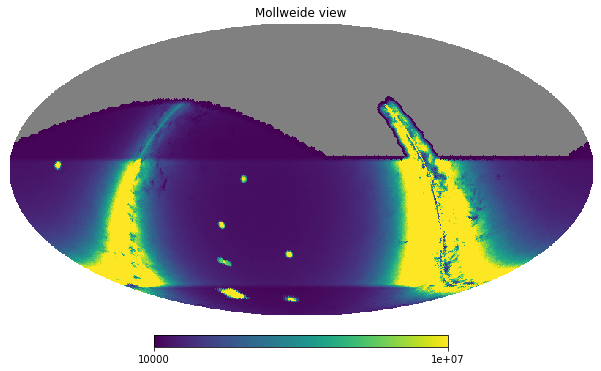

In [8]:
hp.mollview(bundleList[0].metricValues, min=10000, max=1e7)